## Predict Diabetes Using the Pima Indians Diabetes Dataset

The Pima Indians Diabetes Dataset is a real-world dataset. I used  this data for classification tasks. this dataset contains medical information about female patients of Pima Indian heritage and includes features that can help me to create a model to predict whether a person has diabetes or not.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# checking missing value

In [6]:
null_value = data.isnull().sum()

In [7]:
null_value

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

according to the above, I understood that there is no missing values (I mean no NaN values) in this dataset. It means that the missing values are often represented by 0 for certain features like Glucose, BloodPressure, SkinThickness, Insulin, and BMI. This is because, in real-life medical data, some measurements might not have been taken, and the dataset authors filled these missing values with 0 instead of leaving them as NaN.

I can say that this is a problem, because, in medical data for something like Glucose, Blood Pressure and BMI (Body mass index), cannot realistically be 0. 

Therfore, a value of 0 often shows a missing measurement rather than an actual recorded value.

Thus, I need to check if there there are unrealistic zeros in these columns and handle them as missing values. I can replace the zeros with NaN and then fill them with the mean of the column.

In [8]:
zero_values = (data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] == 0).sum()

In [9]:
zero_values

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

now I should to replace the zero with NaN and then fill them with the mean of each column: 

In [10]:
# Replace zeros with NaN for specific columns
handle_missing_values = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

In [11]:
#  The number of NaN values in each column 
handle_missing_values.isnull().sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [12]:
# Fill NaN values with the mean of each column
handle_missing_values.fillna(handle_missing_values.mean(), inplace=True)

In [13]:
# check again to make sure there is no any NaN values
handle_missing_values.isnull().sum()

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

In [14]:
handle_missing_values

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148.0,72.0,35.00000,155.548223,33.6
1,85.0,66.0,29.00000,155.548223,26.6
2,183.0,64.0,29.15342,155.548223,23.3
3,89.0,66.0,23.00000,94.000000,28.1
4,137.0,40.0,35.00000,168.000000,43.1
...,...,...,...,...,...
763,101.0,76.0,48.00000,180.000000,32.9
764,122.0,70.0,27.00000,155.548223,36.8
765,121.0,72.0,23.00000,112.000000,26.2
766,126.0,60.0,29.15342,155.548223,30.1


# Plot a Few Important Features

I create histograms and box plots for key features like Glucose, BMI, and Insulin.

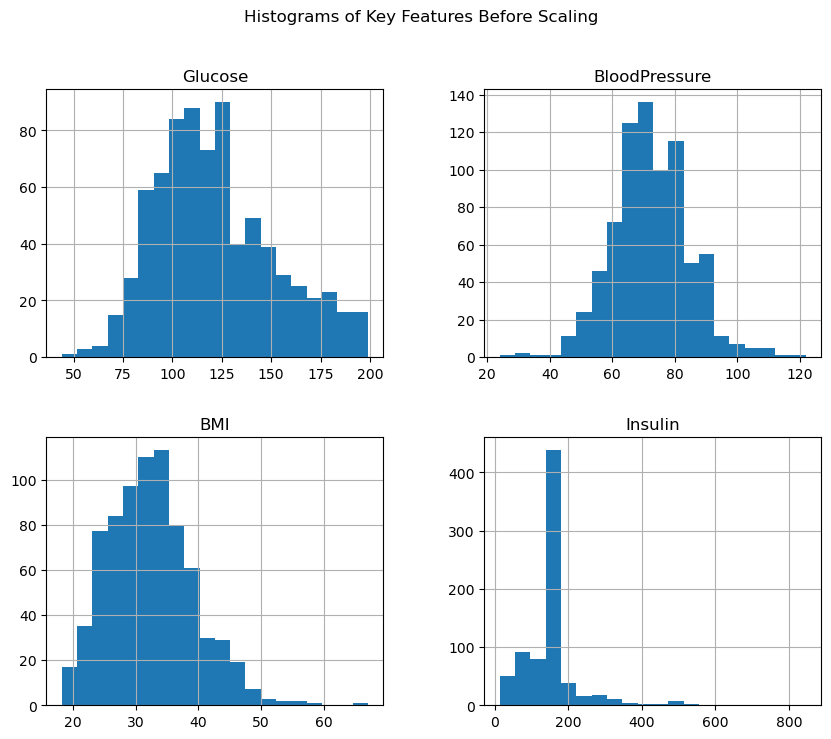

In [15]:
# Plot histograms for key features
features_to_plot = ['Glucose', 'BloodPressure', 'BMI', 'Insulin']
handle_missing_values[features_to_plot].hist(bins=20, figsize=(10, 8))
plt.suptitle("Histograms of Key Features Before Scaling")
plt.show()


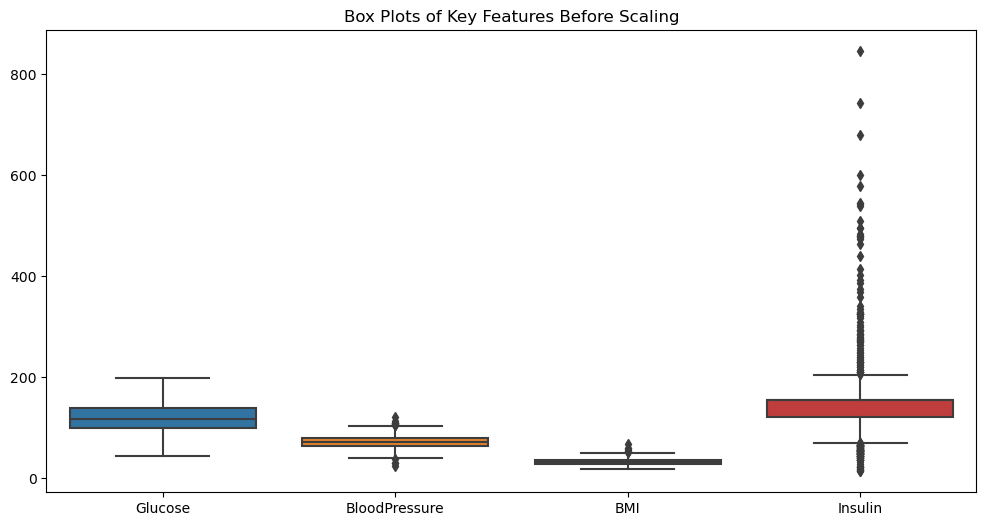

In [16]:
# Plot box plots to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=handle_missing_values[features_to_plot])
plt.title("Box Plots of Key Features Before Scaling")
plt.show()

In [17]:
mean_bloodPresure = data['BloodPressure'].mean()
mean_bloodPresure

69.10546875

#  Feature Scaling

In this machine learning project, I did feature scaling which is to bring all features to a similar range in this project I used StandardScaler for feature scaling. 

In [18]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(handle_missing_values)

In [19]:
# Create a new DataFrame for the scaled features
scaled_dataFrame = pd.DataFrame(scaled_data, columns=handle_missing_values.columns)

In [20]:
scaled_dataFrame

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292
1,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531
2,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833
3,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212
4,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980
...,...,...,...,...,...
763,-0.680125,0.297376,2.145261e+00,2.877840e-01,0.064409
764,0.010298,-0.198965,-2.451185e-01,-3.345079e-16,0.632039
765,-0.022579,-0.033518,-7.004289e-01,-5.125386e-01,-0.910750
766,0.141808,-1.026200,8.087936e-16,-3.345079e-16,-0.343120


# Split the Data

In [21]:
X = scaled_dataFrame 
y = data['Outcome']


# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:

print(f"Training set: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Testing set: X_test = {X_test.shape}, y_test = {y_test.shape}")

Training set: X_train = (537, 5), y_train = (537,)
Testing set: X_test = (231, 5), y_test = (231,)


So now the data has been split into 537 samples of the training set (70%) and 231 samples of the testing set(30%). In addition, now I have 5 features (columns) in both the training and testing sets.





# create and train the model 

Now  the data is split, then I can proceed to train my Logistic Regression model and evaluate its performance.

In [23]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

LogisticRegression()

In [24]:
y_pred = logistic_regression_model.predict(X_test)

In [25]:
acuracy = accuracy_score(y_test, y_pred)
acuracy

0.7532467532467533

This model achieved an accuracy of 75.3% on the test set. Therfore, this result shows that this model is making decent predictions, but there might still be room for improvement.

# Check the Confusion Matrix

I need to check Check the Confusion Matrix which help to understand where the model is making errors 

In [26]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[127,  24],
       [ 33,  47]])

The above result can read as following: 

1. True Negative = 127: it means that the model correctly predicted 127 patients as not having diabetes (0).
   
3. False Positive = 24: it means that the model incorrectly predicted 24 patients as having diabetes (1) when they actually do not (0).
   
5. False Negative = 33: it means that the model incorrectly predicted 33 patients as not having diabetes (0) when they actually do (1).
   
7. True Positive = 47: it means that the model correctly predicted 47 patients as having diabetes (1).



# Calculate Precision and Recall 

Precision tells us the proportion of positive predictions (1) that are actually correct. It is calculated as:




\begin{equation}
\text{Precision} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Positives (FP)}}
\end{equation}

In [27]:
# Extract values from the confusion matrix
tp = 47  # TP
fp = 24  # FP
fn = 33  # FN

In [28]:

precision = tp / (tp + fp)
precision

0.6619718309859155

This means that when the model predicts diabetes (1), it is correct 66% of the time.

Recall is for the proportion of actual positives (1) that the model correctly identifies. It is calculated as:

\begin{equation}
\text{Recall} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Negatives (FN)}}
\end{equation}

In [29]:
recall = tp / (tp + fn)
recall

0.5875

This is means that the model correctly identifies 58% of actual diabetes cases.

# classification report 

we can print the classification report to get all these metrics at once:

In [30]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.82       151
           1       0.66      0.59      0.62        80

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231



The result above shows that the model performs better at predicting No Diabetes (0) cases compared to predicting Diabetes (1) cases. This is common in medical datasets, especially when the classes are imbalanced (more samples of class 0 than class 1).

And also, this result indicates that the F1-score for class 1 (diabetes) is lower, indicating that the model could benefit from improvements in identifying actual diabetes cases.

# Experiment with Random Forest Model 

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Test Accuracy: {accuracy_rf:.2f}")
print("Random Forest Confusion Matrix:\n", conf_matrix_rf)
print("Random Forest Classification Report:\n", class_report_rf)

Random Forest Test Accuracy: 0.71
Random Forest Confusion Matrix:
 [[117  34]
 [ 33  47]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.77      0.78       151
           1       0.58      0.59      0.58        80

    accuracy                           0.71       231
   macro avg       0.68      0.68      0.68       231
weighted avg       0.71      0.71      0.71       231



In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Set up the Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validated Accuracy: {best_score:.2f}")

# Train the Random Forest model with the best hyperparameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

# Make predictions and evaluate the model on the test set
y_pred_rf_tuned = best_rf_model.predict(X_test)
accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
conf_matrix_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned)
class_report_rf_tuned = classification_report(y_test, y_pred_rf_tuned)

print(f"Tuned Random Forest Test Accuracy: {accuracy_rf_tuned:.2f}")
print("Tuned Random Forest Confusion Matrix:\n", conf_matrix_rf_tuned)
print("Tuned Random Forest Classification Report:\n", class_report_rf_tuned)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value f

Best Hyperparameters: {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validated Accuracy: 0.76
Tuned Random Forest Test Accuracy: 0.74
Tuned Random Forest Confusion Matrix:
 [[125  26]
 [ 35  45]]
Tuned Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.83      0.80       151
           1       0.63      0.56      0.60        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231



/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


# Expriment with differnt data split 

In [33]:
X1 = scaled_dataFrame 
y1 = data['Outcome']


# Split the data into training and testing sets (80% training, 20% testing)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [34]:
logistic_regression_model1 = LogisticRegression()
logistic_regression_model1.fit(X_train1, y_train1)

y_pred1 = logistic_regression_model1.predict(X_test1)

acuracy1 = accuracy_score(y_test1, y_pred1)
acuracy1

0.7727272727272727

# cross validation 

In [35]:
cv_scores = cross_val_score(logistic_regression_model1, X1, y1, cv=5)
# Calculating the mean accuracy score
mean_accuracy = cv_scores.mean()
# Displaying the results
print(f"Cross-Validation Scores for each fold: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {mean_accuracy:.4f}")

Cross-Validation Scores for each fold: [0.77922078 0.74025974 0.77922078 0.79738562 0.75163399]
Mean Cross-Validation Accuracy: 0.7695


# Create interface

I created a simple user interface (UI) for this project by using Python’s Streamlit library, which is usualy used for building quick and interactive web apps. 

In [36]:
import streamlit as st

In [37]:
# Create the Streamlit app
st.title("Diabetes Prediction Apps")
st.write("This app uses a Logistic Regression model to predict the likelihood of diabetes based on user input.")

# User input fields
glucose = st.number_input("Glucose Level", min_value=0.0, max_value=300.0, value=120.0)
blood_pressure = st.number_input("Blood Pressure", min_value=0.0, max_value=200.0, value=70.0)
skin_thickness = st.number_input("Skin Thickness", min_value=0.0, max_value=100.0, value=20.0)
insulin = st.number_input("Insulin Level", min_value=0.0, max_value=900.0, value=80.0)
bmi = st.number_input("BMI", min_value=0.0, max_value=100.0, value=25.0)

# Predict button
if st.button("Predict"):
    # Preprocess the user input
    user_data = np.array([[glucose, blood_pressure, skin_thickness, insulin, bmi]])
    user_data_scaled = scaler.transform(user_data)

    # Make the prediction
    prediction = logistic_regression_model.predict(user_data_scaled)
    probability = logistic_regression_model.predict_proba(user_data_scaled)[0][1]

    # Display the prediction
    if prediction[0] == 1:
        st.success(f"The model predicts that the person is likely to have diabetes with a probability of {probability:.2f}.")
    else:
        st.success(f"The model predicts that the person is unlikely to have diabetes with a probability of {1 - probability:.2f}.")

2024-11-12 17:21:47.289 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-12 17:21:47.377 
  command:

    streamlit run /opt/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]
2024-11-12 17:21:47.377 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-12 17:21:47.377 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-12 17:21:47.377 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-12 17:21:47.377 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-12 17:21:47.377 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-12 17:21:47.378 Thread 'MainThread': m

In [38]:
print("ss")

ss
